In [42]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from typing import Callable

In [43]:
func = lambda x: 1/x * np.log(x + 2)


In [44]:
eps = float(input("Введите допустимую погрешность"))
a = float(input("Введите начало отезка"))
b = float(input("Введите конец отрезка"))

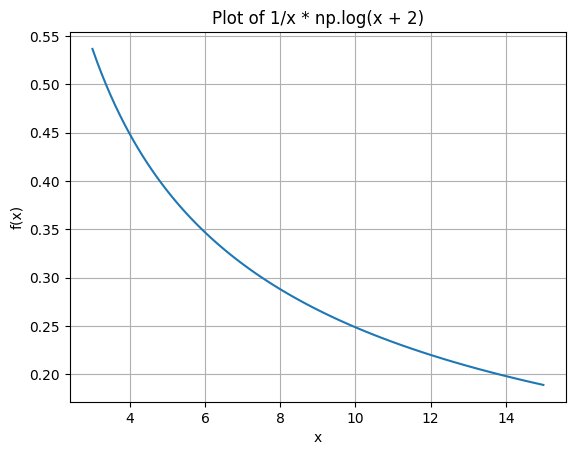

In [45]:
x_values = np.linspace(a, b, 100)

# Evaluate the function for each x-value
y_values = func(x_values)

# Plot the function
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of 1/x * np.log(x + 2)')
plt.grid(True)
plt.show()

In [112]:
class IIntegrateMethod(ABC):

    _func : Callable[[float], float]

    def __init__(self, func : Callable[[float], float]) -> float:
        self._func = func

    @abstractmethod
    def _draw(self, a: float, b: float, n : int) -> None:
        raise NotImplementedError

    @abstractmethod
    def integrate(self, a : float, b : float):
        raise NotImplementedError


In [113]:
class RectengularIntegralMiddle(IIntegrateMethod):

    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a, b, n): 
        h = (b - a) / n

        for i in range(n):
            x_rect = [a + i * h, a + i * h,
                       a + (i + 1) * h, a + (i + 1) * h]
            y_rect = [0, self._func(a + h/2 + i * h), self._func(a + h/2 + i * h),
                       0]
            plt.plot(x_rect, y_rect, color='black')

        x = np.linspace(a, b, 1000)
        y = self._func(x)
        plt.plot(x, y)
        plt.title("Метод средних прямоугольников")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

    def integrate(self, a : float, b : float, eps : float, is_draw : bool = False) -> float:
        n = 10
        h = (b - a) / n
        sum_prev = -np.inf
        sum_curr = np.inf
        x : np.ndarray
        while np.abs(sum_curr - sum_prev) >= (2**2 - 1) * eps:
            sum_prev = sum_curr
            
            x = np.linspace(a + h / 2, b - h / 2, n)  # Generate midpoints of the subintervals
            sum_curr = h * np.sum(self._func(x))

            n *= 2
            h = (b - a) / n

        if (is_draw):
            self._draw(a, b, n // 2)
            
        return sum_curr


In [114]:
class RectengularIntegralLeft(IIntegrateMethod):

    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a, b, n): 
        h = (b - a) / n
        for i in range(n):
            x_rect = [a + i * h, a + i * h, a + (i + 1) * h, a + (i + 1) * h]
            y_rect = [0, self._func(a + i * h), self._func(a + i * h), 0]
            plt.plot(x_rect, y_rect, color='black')

        x = np.linspace(a, b, 1000)
        y = self._func(x)
        plt.plot(x, y)
        plt.title("Метод левых прямоугольников")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

    def integrate(self, a : float, b : float, eps : float, is_draw : bool = False) -> float:
        n = 10
        h = (b - a) / n
        sum_prev = -np.inf
        sum_curr = np.inf
        x : np.ndarray
        while np.abs(sum_curr - sum_prev) >= (2**2 - 1) * eps:
            sum_prev = sum_curr

            x = np.linspace(a, b - h, n)  
            sum_curr = h * np.sum(self._func(x))

            n *= 2
            h = (b - a) / n

        if (is_draw):
            self._draw(a, b, n//2)
            
        return sum_curr

In [115]:
class RectengularIntegralRight(IIntegrateMethod):

    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a, b, n):
        h = (b - a) / n
        for i in range(n):
            x_rect = [a + i * h, a + i * h, a + (i + 1) * h, a + (i + 1) * h]
            y_rect = [0, self._func(a + h + i * h), self._func(a + h + i * h), 0]
            plt.plot(x_rect, y_rect, color='black')

        x = np.linspace(a, b, 1000)
        y = self._func(x)
        plt.plot(x, y)
        plt.title("Метод правых прямоугольников")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

    def integrate(self, a : float, b : float, eps : float, is_draw : bool = False) -> float:
        n = 10
        h = (b - a) / n
        sum_prev = -np.inf
        sum_curr = np.inf
        x : np.ndarray
        while np.abs(sum_curr - sum_prev) >= (2**2 - 1) * eps:
            sum_prev = sum_curr

            x = np.linspace(a - h, b, n)  
            sum_curr = h * np.sum(self._func(x))

            n *= 2
            h = (b - a) / n

        if (is_draw):
            self._draw(a, b, n//2)
            
        return sum_curr

In [116]:
rectengular_integral_left = RectengularIntegralLeft(func)
rectengular_integral_middle = RectengularIntegralMiddle(func)
rectengular_integral_right = RectengularIntegralRight(func)


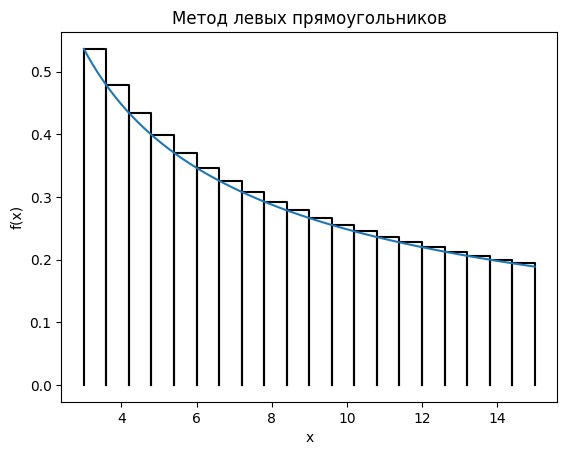

3.62128810032422


In [117]:
print(rectengular_integral_left.integrate(a, b, eps, True))

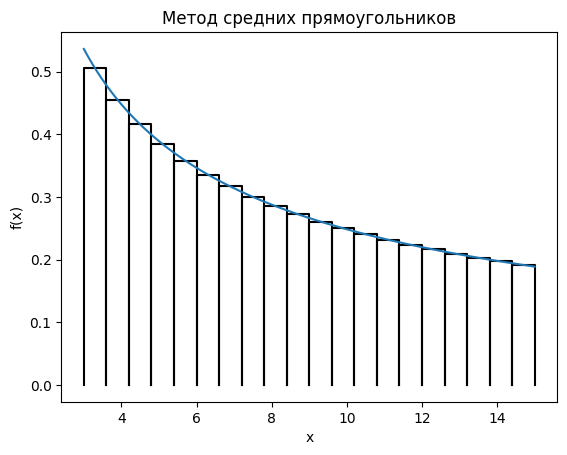

3.512370100269373


In [118]:
print(rectengular_integral_middle.integrate(a, b, eps, True))

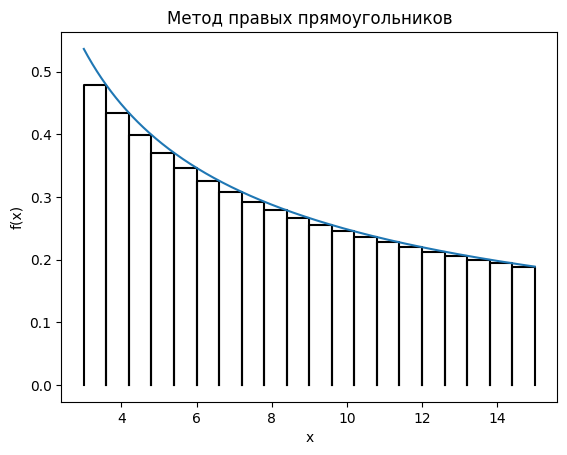

3.738013732524125


In [119]:
print(rectengular_integral_right.integrate(a, b, 2, True))

In [120]:
class TrapezeIntegral(IIntegrateMethod):

    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a: float, b: float, n: float):

        x = np.linspace(a, b, 100)
        y = self._func(x)
        plt.plot(x, y)

        h = (b - a) / n
        for i in range(n):
            x_trap = [a + i * h, a + i * h, a + (i + 1) * h, a + (i + 1) * h]
            y_trap = [0, self._func(a + i * h), self._func(a + (i + 1) * h), 0]
            plt.plot(x_trap, y_trap, color='black')

        plt.title("Метод трапеций")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

    def integrate(self, a : float, b : float, eps : float, is_draw : bool = False) -> float:
        n = 10
        h = (b - a) / n
        sum_prev = -np.inf
        sum_curr = np.inf
        while np.abs(sum_curr - sum_prev) >= (2**2 - 1) * eps:
            sum_prev = sum_curr
            x = np.linspace(a + h, b - h, n-1)  # Generate points for trapezoidal rule
            sum_curr = (self._func(a) + self._func(b)) / 2
            sum_curr += np.sum(self._func(x))

            sum_curr *= h
            n *= 2
            h = (b - a) / n

        if is_draw:
            self._draw(a, b, n // 2)
            
        return sum_curr

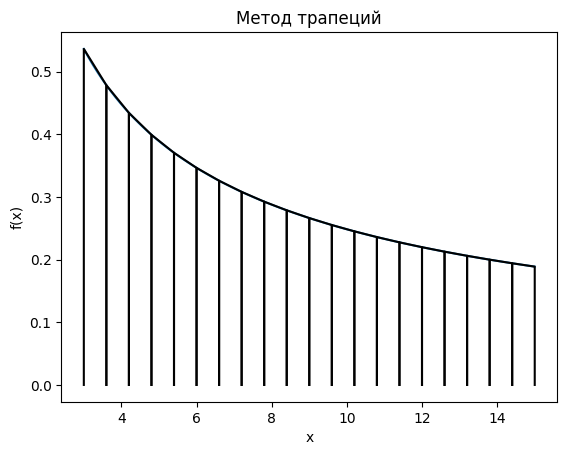

3.517008575961934

In [121]:
trapeze_integral = TrapezeIntegral(func)
trapeze_integral.integrate(a, b, eps, True)

In [122]:
class SimpsonIntegral(IIntegrateMethod):

    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a, b, n):
        x = np.linspace(a, b, 1000)
        y = self._func(x)
        plt.plot(x, y, "r-", lw=2)

        h = (b - a) / n
        for i in range(n):
            x_parab = [a + i * h, a + (i + 1) * h, a + (i + 1 / 2) * h, a + i * h]
            y_parab = [self._func(a + i * h), self._func(a + (i + 1) * h),
                        self._func(a + (i + 1 / 2) * h), self._func(a + i * h)]
            plt.plot(x_parab, y_parab, "b", lw=1, alpha=0.8)

        plt.title("Метод парабол")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

    def integrate(self, a : float, b : float, eps : float, is_draw : bool = False) -> float:
        n = 10
        h = (b - a) / n
        sum_prev = -np.inf
        sum_curr = np.inf
        while np.abs(sum_curr - sum_prev) >= (2**4 - 1) * eps:
            sum_prev = sum_curr
            
            x_even = np.linspace(a + 2*h, b - 2*h, n//2 - 1)  
            x_odd = np.linspace(a + h, b - h, n//2 - 1) 
            sum_curr = self._func(a) + self._func(b)
            sum_curr += 2 * np.sum(self._func(x_even))
            sum_curr += 4 * np.sum(self._func(x_odd))

            sum_curr *= h / 3
            n *= 2
            h = (b - a) / n

        if (is_draw):
            self._draw(a, b, n//2)
            
        return sum_curr

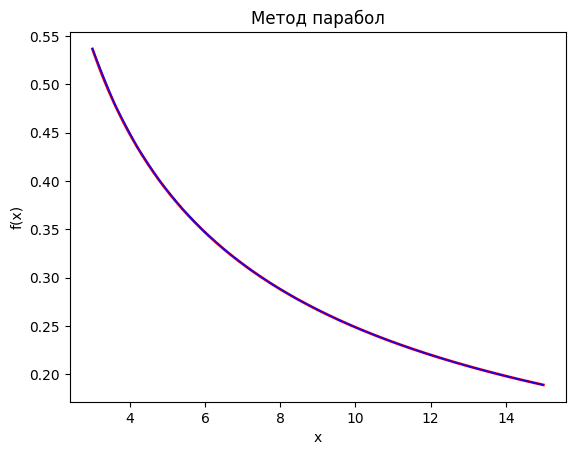

3.2853861598218526

In [123]:
simpson_integral = SimpsonIntegral(func)
simpson_integral.integrate(a, b, eps, True)

In [127]:
class MonteKarloIntegrateCommon(IIntegrateMethod):
    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def _draw(self, a: float, b: float, n: int) -> None:
        pass

    def integrate(self, a : float, b : float, N : int) -> float:
              
        random_array = np.random.uniform(a, b, size=N)
        sum = np.sum(self._func(random_array))
        sum *= (b - a) / N
        
        return sum
    

In [128]:
N = int(input("Введите N для метода Монте-Карло"))

In [129]:
monte_carlo = MonteKarloIntegrateCommon(func)
monte_carlo.integrate(a, b, N)

3.527965689429663

In [130]:
class MonteKarloIntegrateGeometric(IIntegrateMethod):
    def __init__(self, func : Callable[[float], float]):
        super().__init__(func)

    def __max_value_fucn(self, a : float, b : float) -> float:
        x = np.arange(a, b, 0.001)
        return np.max(self._func(x))
    
    def _draw(self, x : np.ndarray, y : np.ndarray,
               a : float, b : float) -> None:
        plt.figure()
        x_curve = np.linspace(a, b, 100)
        y_curve = self._func(x_curve)
        plt.plot(x_curve, y_curve, color='black', label='Кривая')

        # Разделение точек по цвету
        plt.scatter(x[y < self._func(x)], y[y < self._func(x)], color='blue', label='Точки ниже прямой', s=0.1)
        plt.scatter(x[y >= self._func(x)], y[y >= self._func(x)], color='red', label='Точки выше прямой', s=0.1)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()


    def integrate(self, a : float, b : float, N : int,
                  is_draw : bool = False) -> float:
              
        max = self.__max_value_fucn(a, b)

        x = np.random.uniform(a, b, size=N)
        y = np.random.uniform(0, max, size=N)

        S_par = (b - a) * (max - 0)
        count = np.sum(y < func(x))

        if (is_draw):
            self._draw(x, y, a, b)
        
        return S_par * count / N

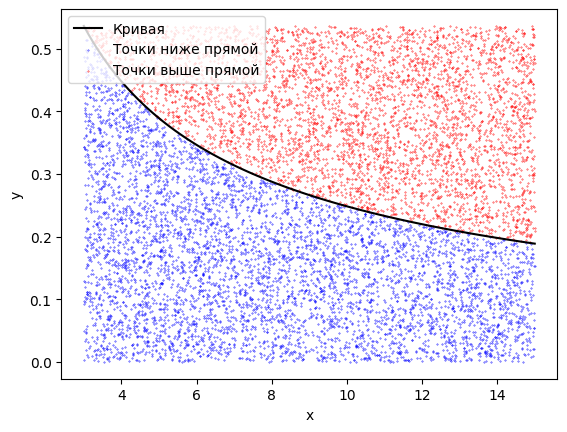

3.5594328871392555

In [131]:
monte_carlo_geom = MonteKarloIntegrateGeometric(func)
monte_carlo_geom.integrate(a, b, N, True)